# DAB-SMOTE SOLVERS ANALYSIS #
## Authors: Unai Lalana Morales & José Antonio Sanz Delgado ##

### Imports ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
#autoreload
%load_ext autoreload
%autoreload 2

#DAB-SMOTE import
from classes.Visual_DAB import Visual_DAB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Functions ###

In [21]:
def visualize_data(point, labels, X, type='mean'):
    plt.figure(figsize=(6, 6))
    for label in np.unique(labels):
        mask = labels == label
        if label != -1:
            plt.scatter(X[mask, 0], X[mask, 1], s=10,label=f'Cluster {label}',color=plt.cm.tab10(label % 10))
        else:
            plt.scatter(X[mask, 0], X[mask, 1], s=10, color='gray', label='Noise')
    if point is not None:
        for p in range(len(point)):
            if p == 0:
                if type == 'densest':
                    plt.scatter(point[p][0], point[p][1], color='red', s=80, marker='*', label='Densest point')
                elif type == 'closest':
                    plt.scatter(point[p][0], point[p][1], color='red', s=80, marker='*', label='Closest point')
                elif type == 'mixed':
                    plt.scatter(point[p][0], point[p][1], color='red', s=80, marker='*', label='Mixed point')
                else:
                    plt.scatter(point[p][0], point[p][1], color='red', s=80, marker='*', label='Mean point')
            else:
                plt.scatter(point[p][0], point[p][1], color='red', s=80, marker='*')
        if type == 'densest':
            plt.title("Clusters found by DBSCAN and densest point")
        elif type == 'closest':
            plt.title("Clusters found by DBSCAN and closest point")
        elif type == 'mixed':
            plt.title("Clusters found by DBSCAN and mixed point")
        else:
            plt.title("Clusters found by DBSCAN and mean point")
        
    else:
        plt.title("Clusters found by DBSCAN")
    plt.legend()
    plt.axis('equal')
    plt.show()

### Dataset creation ###

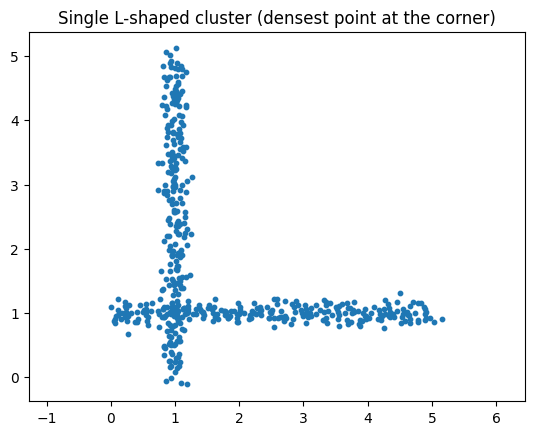

In [5]:
# Horizontal arm of the L (bottom)
np.random.seed(42)
x_h = np.linspace(0, 5, 250)
y_h = np.ones_like(x_h)

# Vertical arm of the L (left)
y_v = np.linspace(0, 5, 250)
x_v = np.ones_like(y_v)

# Add small noise to make it more realistic
x_h += np.random.normal(scale=0.1, size=x_h.shape)
y_h += np.random.normal(scale=0.1, size=y_h.shape)
x_v += np.random.normal(scale=0.1, size=x_v.shape)
y_v += np.random.normal(scale=0.1, size=y_v.shape)

# Combine into a single point cloud
X = np.vstack((
    np.column_stack((x_h, y_h)),
    np.column_stack((x_v, y_v))
))

# Visualize
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Single L-shaped cluster (densest point at the corner)")
plt.axis('equal')
plt.show()


### Basic DBSCAN ###

### Mean centers ###

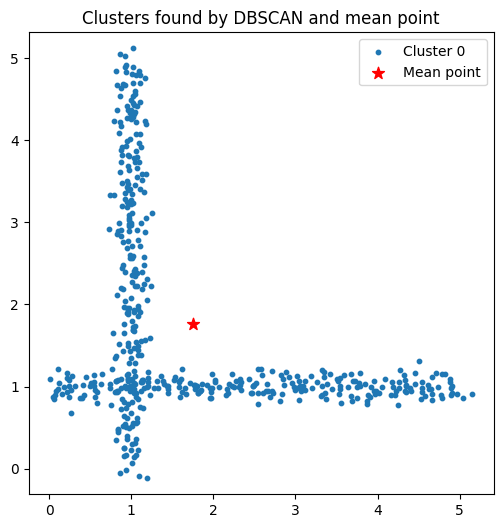

In [6]:
dab = Visual_DAB(k=1.5)
centre, clusters = dab.get_clustering(X)
visualize_data(centre, clusters, X)

### Density based center ###

Densest point: [[1.11365708 0.94084286]]


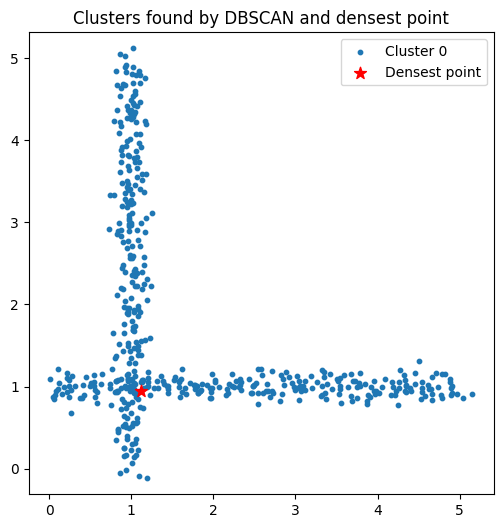

In [7]:
centre, clusters = dab.get_clustering(X, solver='density')
print(f"Densest point: {centre}")
visualize_data(centre, clusters, X, type='densest')

### Closest Point to Center based center ###

Closest point: [[1.22706929 1.58988691]]


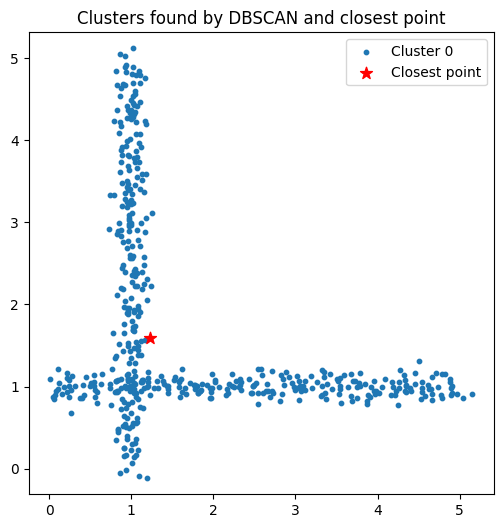

In [22]:
centre, clusters = dab.get_clustering(X, solver='closest')
print(f"Closest point: {centre}")
visualize_data(centre, clusters, X, type='closest')

Mixed point: [[1.43008453 1.34909864]]


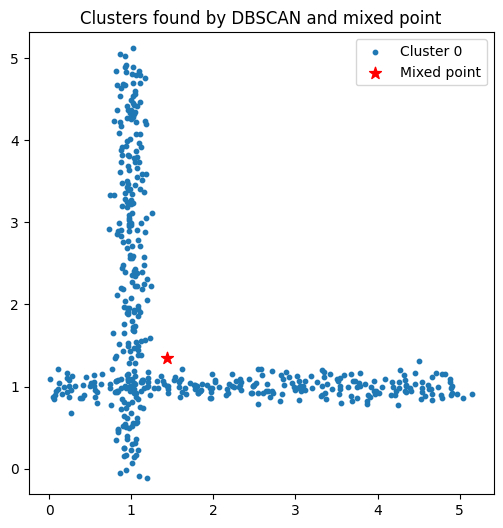

In [23]:
centre, clusters = dab.get_clustering(X, solver='mixed')
print(f"Mixed point: {centre}")
visualize_data(centre, clusters, X, type='mixed')

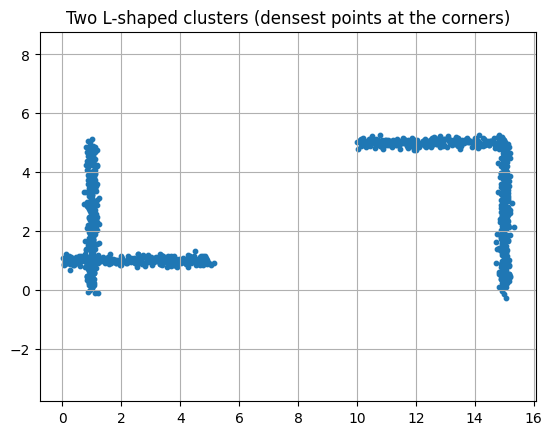

In [9]:
np.random.seed(42)
x_h1 = np.linspace(0, 5, 250)
y_h1 = np.ones_like(x_h1)

y_v1 = np.linspace(0, 5, 250)
x_v1 = np.ones_like(y_v1)

x_h1 += np.random.normal(scale=0.1, size=x_h1.shape)
y_h1 += np.random.normal(scale=0.1, size=y_h1.shape)
x_v1 += np.random.normal(scale=0.1, size=x_v1.shape)
y_v1 += np.random.normal(scale=0.1, size=y_v1.shape)

x_h2 = np.linspace(0, 5, 250)
y_h2 = np.ones_like(x_h2) * 5 
x_h2 += 10                     

y_v2 = np.linspace(0, 5, 250)
x_v2 = np.ones_like(y_v2) * 5
x_v2 += 10                     
y_v2 += 0                      

x_h2 += np.random.normal(scale=0.1, size=x_h2.shape)
y_h2 += np.random.normal(scale=0.1, size=y_h2.shape)
x_v2 += np.random.normal(scale=0.1, size=x_v2.shape)
y_v2 += np.random.normal(scale=0.1, size=y_v2.shape)

X2 = np.vstack((
    np.column_stack((x_h1, y_h1)),
    np.column_stack((x_v1, y_v1)),
    np.column_stack((x_h2, y_h2)),
    np.column_stack((x_v2, y_v2))
))

plt.scatter(X2[:, 0], X2[:, 1], s=10)
plt.title("Two L-shaped clusters (densest points at the corners)")
plt.axis('equal')
plt.grid(True)
plt.show()


mean point: [[ 1.74651199  1.75735442]
 [13.75888726  3.75527998]]


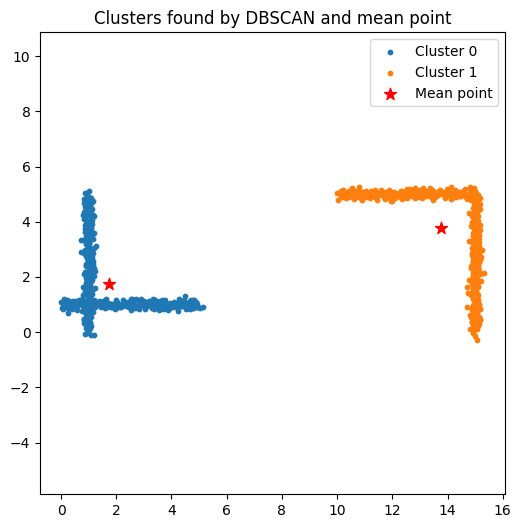

In [10]:
centre2, clusters2 = dab.get_clustering(X2, solver='means')
print(f"mean point: {centre2}")
visualize_data(centre2, clusters2, X2)

Densest point: [[ 1.11365708  0.94084286]
 [14.90645613  4.49612109]]


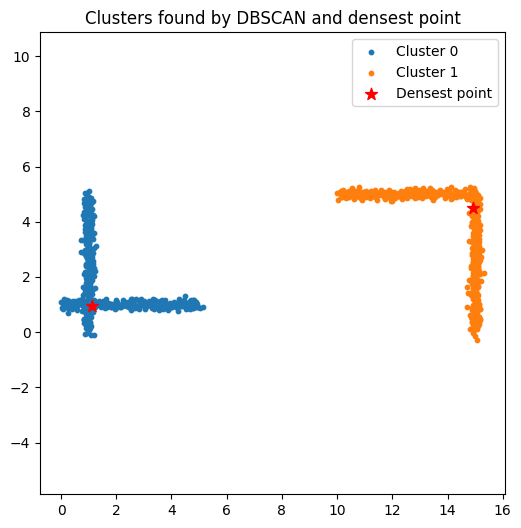

In [11]:
centre2, clusters2 = dab.get_clustering(X2, solver='density')
print(f"Densest point: {centre2}")
visualize_data(centre2, clusters2, X2, type='densest')

Closest point: [[ 1.22706929  1.58988691]
 [13.48598872  4.80336434]]


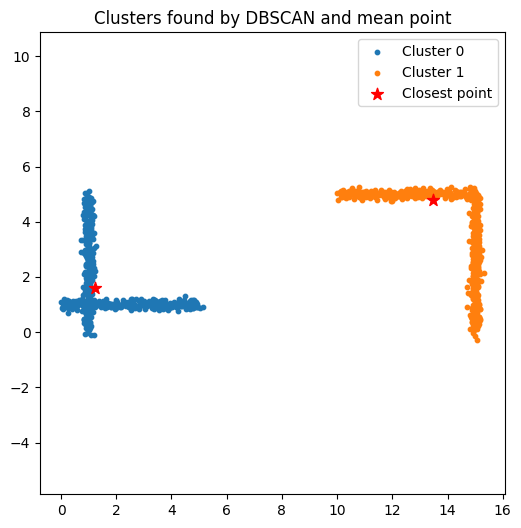

In [12]:
centre2, clusters2 = dab.get_clustering(X2, solver='closest')
print(f"Closest point: {centre2}")
visualize_data(centre2, clusters2, X2, type='closest')

Mixed point: [[ 1.43008453  1.34909864]
 [14.3326717   4.12570054]]


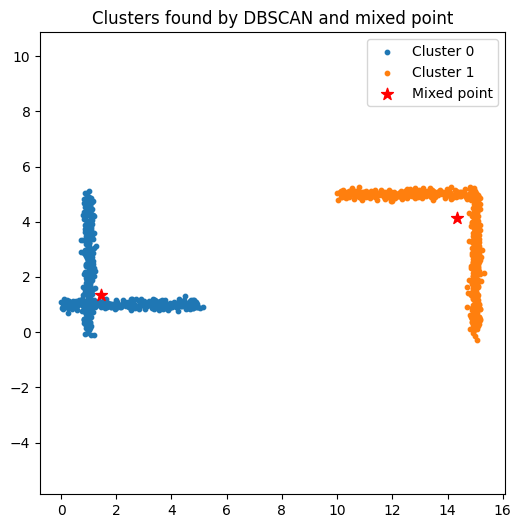

In [25]:
centre2, clusters2 = dab.get_clustering(X2, solver='mixed')
print(f"Mixed point: {centre2}")
visualize_data(centre2, clusters2, X2, type='mixed')